# AlexNet 实验
* 关于数据
* [本实验数据](http://download.tensorflow.org/example_images/flower_photos.tgz)
* [牛津大学视觉组数据](http://www.robots.ox.ac.uk/~vgg/data/)

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from helper import helper,alexnet_model
%matplotlib inline

## 建立数据

In [3]:
data_path = 'data\\flower'
image_lists = helper.create_image_lists(data_path, 10, 10)
class_count = len(image_lists.keys())
all_class = list(image_lists.keys())

INFO:tensorflow:Looking for images in 'daisy'
INFO:tensorflow:Looking for images in 'dandelion'
INFO:tensorflow:Looking for images in 'roses'
INFO:tensorflow:Looking for images in 'sunflowers'
INFO:tensorflow:Looking for images in 'tulips'


## 随机观看数据

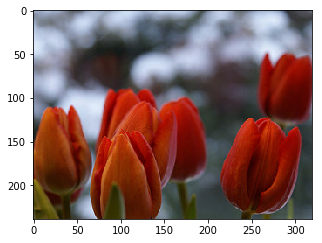

In [21]:
view_dir = random.sample(all_class, 1)
view_path = data_path + '\\' + view_dir[0] + '\\'+ random.sample(image_lists[view_dir[0]]['training'], 1)[0]
view_img = cv2.imread(view_path)
view_img = view_img[:,:,[2,1,0]]

plt.figure(figsize=(5,5))
plt.imshow(view_img)

## 设置超参

In [4]:
epochs = 500
batch_size = 32
lr = 0.001
input_height = 224 
input_width = 224 
input_depth = 3

## AlexNet
![AlexNet](assets/alexnet.png)

## 建立神经网络

In [5]:
y = tf.placeholder(tf.int32, (None, class_count))
x = tf.placeholder(tf.float32, [None, 224, 224, 3])

logits = alexnet_model.alex_net(x, class_count)

loss_operation = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate = lr)
training_operation = optimizer.minimize(loss_operation)
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
tf.summary.scalar('accuracy',accuracy_operation)

<tf.Tensor 'accuracy:0' shape=() dtype=string>

## 开始训练

In [6]:
save_model_path = 'model_alexnet/alexnet'
saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    merged = tf.summary.merge_all()
    training_writer = tf.summary.FileWriter("alexnet_logs/training", sess.graph)
    validation_writer = tf.summary.FileWriter("alexnet_logs/validation")
    
    print("Training...")
    print()
    for epoch in range(epochs):
        train_images, train_labels = helper.get_batch(data_path, batch_size, all_class, class_count, image_lists)
        train_x = helper.get_image(train_images, input_height, input_width, input_depth)
    
        _, train_summary, train_acc = sess.run([training_operation, merged, accuracy_operation] , feed_dict={x:train_x , y:train_labels})
        training_writer.add_summary(train_summary, epoch)
            
        val_images, val_labels = helper.get_batch(batch_size, all_class, class_count, image_lists, model='validation')
        val_x = helper.get_image(val_images, input_height, input_width, input_depth)
        val_acc,val_summary = sess.run([accuracy_operation, merged] , feed_dict={x: val_x, y: val_labels})
        validation_writer.add_summary(val_summary, epoch)
        if epoch%10 == 0:
            print("EPOCH {} ...".format(epoch+1))
            print("Training Accuracy = {:.3f} ; Validation Accuracy = {:.3f}".format(train_acc, val_acc))
            print()
        
    save_path = saver.save(sess, save_model_path)
    print("Model saved")

training_writer.close()
validation_writer.close()

Training...

EPOCH 1 ...
Training Accuracy = 0.344 ; Validation Accuracy = 0.094

EPOCH 11 ...
Training Accuracy = 0.250 ; Validation Accuracy = 0.188

EPOCH 21 ...
Training Accuracy = 0.188 ; Validation Accuracy = 0.219

EPOCH 31 ...
Training Accuracy = 0.312 ; Validation Accuracy = 0.312

EPOCH 41 ...
Training Accuracy = 0.219 ; Validation Accuracy = 0.344

EPOCH 51 ...
Training Accuracy = 0.156 ; Validation Accuracy = 0.094

EPOCH 61 ...
Training Accuracy = 0.312 ; Validation Accuracy = 0.375

EPOCH 71 ...
Training Accuracy = 0.250 ; Validation Accuracy = 0.188

EPOCH 81 ...
Training Accuracy = 0.281 ; Validation Accuracy = 0.219

EPOCH 91 ...
Training Accuracy = 0.250 ; Validation Accuracy = 0.188

EPOCH 101 ...
Training Accuracy = 0.406 ; Validation Accuracy = 0.281

EPOCH 111 ...
Training Accuracy = 0.281 ; Validation Accuracy = 0.125

EPOCH 121 ...
Training Accuracy = 0.188 ; Validation Accuracy = 0.219

EPOCH 131 ...
Training Accuracy = 0.344 ; Validation Accuracy = 0.344

EPOC